In [1]:
!pip install -U sentence-transformers


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


e:\AI_Based_Resume_Screening\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
df = pd.read_csv("../data/interim/cleaned_data.csv")
X = df['processed_resume'].tolist()
y = df['label']

# Load label encoder
le = joblib.load("../models/label_encoder.pkl")


In [11]:
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute 384-dim BERT embeddings for all resumes
X_bert = bert_model.encode(X, show_progress_bar=True)

# Save the BERT model (optional)
joblib.dump(bert_model, '../models/bert_encoder.pkl')


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Batches: 100%|██████████| 31/31 [09:11<00:00, 17.80s/it]


['../models/bert_encoder.pkl']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)


In [13]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


Accuracy: 0.9430051813471503
Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       0.67      1.00      0.80         6
       Automation Testing       0.62      1.00      0.77         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      0.25      0.40         4
           Civil Engineer       1.00      0.67      0.80         9
             Data Science       0.83      1.00      0.91         5
                 Database       1.00      0.88      0.93         8
          DevOps Engineer       1.00      1.00      1.00        14
         DotNet Developer       1.00      0.80      0.89         5
            ETL Developer       0.88      1.00      0.93         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      0.83      0.91        12
        

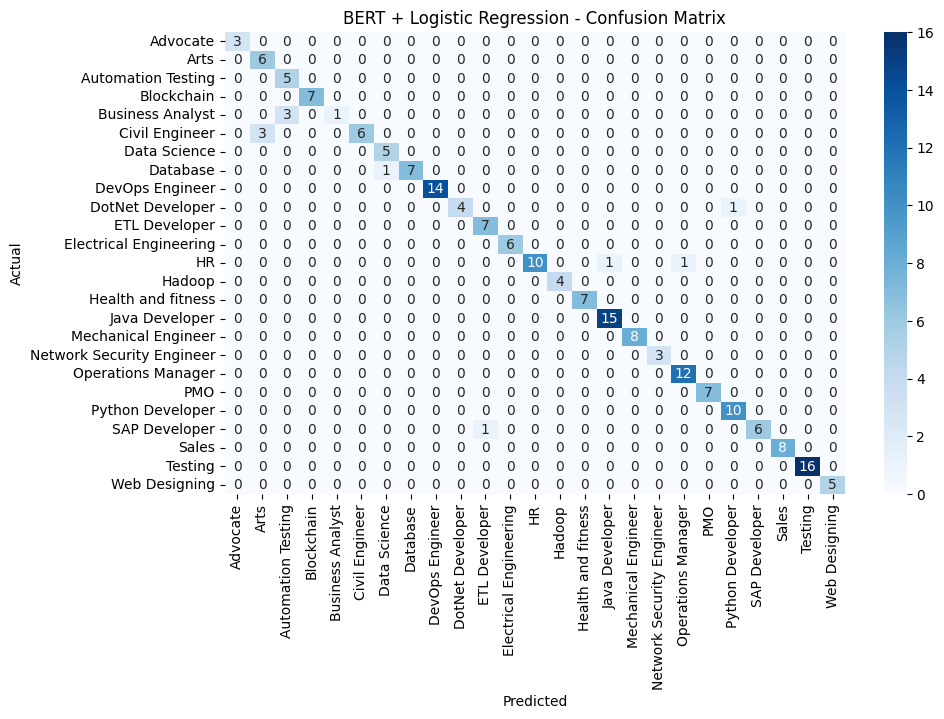

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("BERT + Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
joblib.dump(lr_model, '../models/bert_logistic_model.pkl')


['../models/bert_logistic_model.pkl']